# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [5]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [2]:
# P(B | A) = P(A and B)/P(A) --> .4 = P(A and B)/.7
ans1 = .4*.7

# P(A or B) = P(A) + P(B) - P(A and B)
ans2 = .7 + .4 - .28

# P(A | B) = P(A and B)/P(B)
ans3 = .28/.5

# P(B | A') = P(A' and B)/P(A') = .22/(1-.7)
# P(A' and B) = both A not happening AND B happening, which is P(B) - P(A and B) = .5 - .28 = .22
ans4 = .22/(1-.7)

ans1, ans2, ans3, ans4

(0.27999999999999997, 0.8200000000000001, 0.56, 0.7333333333333333)

### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [11]:
def combinations(n, k):
    num = np.math.factorial(n)
    denom = np.math.factorial(k)*np.math.factorial(n-k)
    return num/denom

In [13]:
# P(King or Queen) = P(K) + P(Q)
# P(K and Q) = 0
ans1 = 4/52 + 4/52

# 52C5
ans2 = combinations(52, 5)

# you have 5 cards, how many ways could you have gotten 2 red cards and 3 black cards
# ways to choose 2 red and 3 black/ways to choose 5 cards
# 26 red, 26 black in a deck
# 26C2 * 26C3
ans3 = (combinations(26, 2)*combinations(26, 3))/ans2
ans1, ans2, ans3

(0.15384615384615385, 2598960.0, 0.3251300520208083)

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [14]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    """
    # binomial model
    # k successes = k points scored
    # P(X = k) = nCk p^k (1-p)^(n-k)
    prob = combinations(n, k)*p**k*(1-p)**(n-k)
    
    return prob

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [17]:
# P(K or Q or J) = 4/52 + 4/52 + 4/52
ans2 = probability_of_scoring_k(22, 4/52 + 4/52 + 4/52 , 8)
ans2

0.009678800175908038

3. Plot the probability mass function of $k$ in 22 draws.


Text(0, 0.5, 'Probability of k Successes')

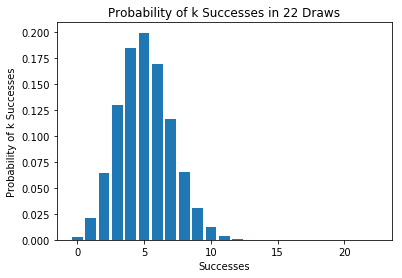

In [81]:
# num of successes
x = [x for x in range(23)]

# probability of getting x successes
y = [probability_of_scoring_k(22, 12/52, y) for y in range(23)]

plt.bar(x, y)
plt.title('Probability of k Successes in 22 Draws')
plt.xlabel('Successes')
plt.ylabel('Probability of k Successes')

4. Plot the cumulative density function of $k$ in 22 draws.

Text(0, 0.5, 'Probability of k or Fewer Successes')

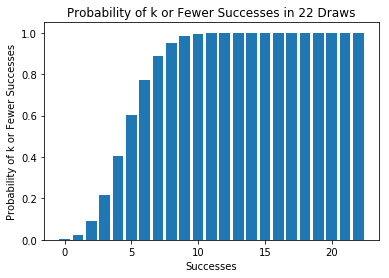

In [82]:
# initializes them all to zeroes so we can add onto it in 
# the while loop
y2 = [0 for x in range(len(y))]

# go through each of the pmf values
for i in range(len(y)):
    j = 0
    
    # sum all the values of the pmf up to and including the
    # current pmf val
    while j <= i:
        y2[i] += y[j]
        j += 1
        
plt.bar(x, y2)
plt.title('Probability of k or Fewer Successes in 22 Draws')
plt.xlabel('Successes')
plt.ylabel('Probability of k or Fewer Successes')

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [43]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = np.mean(ratings)
median = np.median(ratings)
mode = stats.stats.mode(ratings)[0][0]
standard_deviation = np.std(ratings)
number_range = ratings[-1] - ratings[0]
interquartile_range = np.percentile(ratings, 75) - np.percentile(ratings, 25)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694444444444445 
Median:  8.0 
Mode:  8.0 
Standard Deviation:  2.351942984527715 
Range:  9 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [44]:
# I would use the median because: 
# (1) the average is being brought down by low scores that are not
# representative of the whole group
# (2) though the mode and median are the same, I wouldn't want
# to just present the most common review as /the/ representative
# rating, since it may not always best describe the public's feelings
# about a restaurant. It may be that the most common review of a 
# restaurant is 3.5 stars, but there are nearly as many 4 stars, and
# several 5 stars and then we're not getting an accurate picture of 
# what the public thinks. By using the median, the few more stars
# that 5 and 4 add, cumulatively, will outweigh the 3.5 stars
# (supposing that there aren't any ratings lower than 3.5), and that
# would be a more accurate reporting. If they didn't outweight the
# 3.5 and lower stars, then 3.5 /would/ be an accurate representation.

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

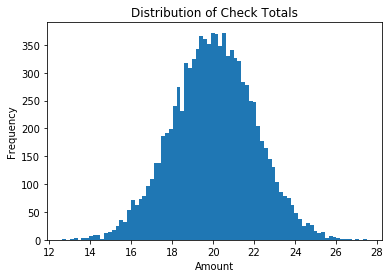

In [45]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [55]:
def z_score(check_amt):
    
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    return (check_amt - 20)/(2)

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [56]:
print(z_score(23))
ans2 = False # pval is greater than alpha
print(z_score(24))
ans3 = True # pval is less than alpha

1.5
2.0


4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [1]:
# two sided -- .025% on either side
n = 10000
moe = 1.96*2 #std = 2 (we don't use sqrt(2) because 10,000 IS the population -- it's all their checks ever)
(20 - moe, 20 + moe)

(16.08, 23.92)

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [59]:
# The CLT says that as we take the mean of more and more samples,
# the distribution of those sample means is normally distributed
# and, they are centered about the true population mean. 

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ No difference observed in spending after adding queso; $$\mu_{no queso} = \mu_{queso}$$ OR $$X_Q = X_{No Q}$$

$H_{A}:$ There is a difference in spending after adding queso; $$\mu_{noqueso} \neq \mu_{queso}$$ OR $$X_Q \neq X_{No Q}$$

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
# Type I: False positive -- seeing a difference in spending where
# in reality, there was no difference in spending after adding
# queso to the menu

# Type II: False negative -- failing to see a difference in spending
# where the really was a difference in spending after adding queso
# to the menu

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

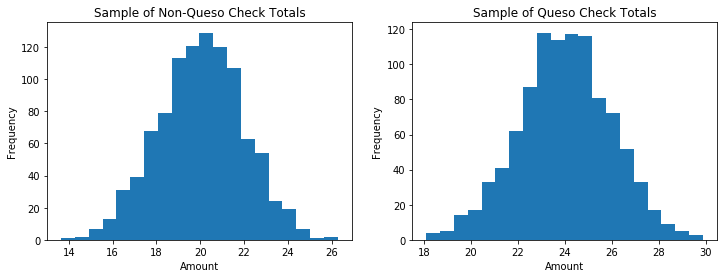

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [75]:
# two-tailed t-test, since we don't have info on the population
stats.stats.ttest_ind(queso, no_queso)
# we got that our pvalue is very very tiny, so we reject the null
# and conclude that queso definitely did make a difference in 
# check totals. 

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

2. What are the conditions required to perform the test you chose?

In [66]:
# you're comparing the mean or proportion
# they have the same variance & n (otherwise use Welch's)
# you're looking at a normal distribution (CLT guarantees this)
# the variables are continuous
# samples are random 

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [ ]:
# P = goes to pet store, P' = goes to pound
# S = gets small dog, M = gets medium dog, L = gets large dog
# P(P) = .2, P(S|P) = .6, P(M|P) = .3, P(L|P) = .1
# P(S|P') = .1, P(M|P') = .35, P(L|P') = .55

# P(S) = P(S|P) + P(S|P')
ans1 = .6 + .1

# P(P|L) = P(L | P)*P(P)/P(L)
# P(L) = P(L|P) + P(L|P')
ans2 = .1*.2/(.1+.55)

# P(P|S) VS P(P'|S) --> P(S|P)P(P)/P(S) VS P(S|P')P(P')/P(S)
# --> .6*.2/.7 VS .1*.8/.7 --> approx .17 VS .11
ans3 = "pet store"


ans4_prior = "pet store"
ans4_posterior = "pet store | large dog"
ans4_likelihood = "large dog | pet store"